In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import soundfile as sf 
import pyfilterbank.gammatone as g
import SFA_Tools.SFA_Sets as s

In [2]:
def chirp(l, r , a, f, d):
    out = np.arange(0, l/r,step = 1/r)
    x = (a*(f/d))*np.exp(-1*f*out/d)*np.sin(2*np.pi*f*out)
    return x

In [3]:
file = 'water.wav'
data, rate = sf.read(file)
size = 400000
data = (data[:,0]+data[:,1])/2
data = data[0:size]

In [4]:
x = g._create_impulse(2000)
gfb = g.GammatoneFilterbank(order=1, density = 1.0, startband = -21, endband = 21, normfreq = 2200)
analyse = gfb.analyze(data)
imax, slopes = gfb.estimate_max_indices_and_slopes()

In [5]:
transform = np.zeros((len(gfb.centerfrequencies),size))
for i in range(len(gfb.centerfrequencies)):
    (band,state) = analyse.__next__()
    transform[i] = abs(band)

In [6]:
avg = np.mean(transform,axis = 1)
var = np.var(transform,axis = 1)
rate = 2
length = 100000
sample = 44100
chirp_leng = 10000
centers = gfb.centerfrequencies
decay = 2
prob = avg/np.sum(avg)

In [7]:
t = np.floor((length+chirp_leng)/rate).astype(int)
times = np.random.exponential(rate,t)

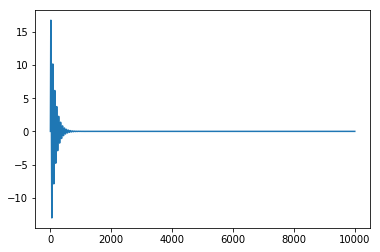

In [8]:
t = np.floor((length+chirp_leng)/rate).astype(int)
times = np.random.exponential(rate,t)
times = np.cumsum(times)
times = np.floor(times).astype(int)
times = times[times<length]
arr = np.zeros(length+chirp_leng)
loc = np.random.choice(np.arange(centers.size),times.size,p = prob)
f = centers[loc]
f = f[::-1]
a = np.random.normal(avg[loc],var[loc])
c = chirp(chirp_leng,sample,a[0],centers[12],decay)
plt.plot(c)
plt.show()

In [9]:
for i in range(times.size):
    time = times[i]
    arr[time:time+chirp_leng] = s.chirp(chirp_leng,sample,a[i],f[i],decay)
arr = arr[0:length]

In [10]:
analyse2 = gfb.analyze(arr)
imax, slopes = gfb.estimate_max_indices_and_slopes()

In [11]:
generated = np.zeros((len(gfb.centerfrequencies),length))
for i in range(len(gfb.centerfrequencies)):
    (band,state) = analyse2.__next__()
    generated[i] = abs(band)

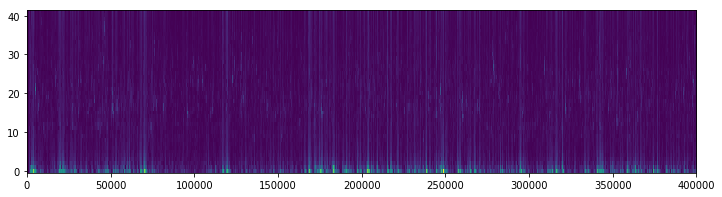

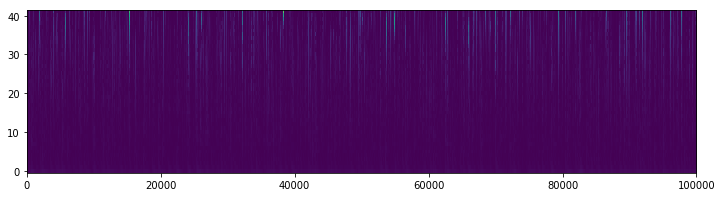

In [12]:
plt.figure(figsize=(12,3))
plt.imshow(transform, aspect = 'auto', origin = 'lower')
plt.figure(figsize=(12,3))
plt.imshow(generated, aspect = 'auto', origin = 'lower')

In [13]:
np.savetxt("water_generated_transformed.csv", generated, delimiter = ",")
sf.write("water_generated.wav",arr,sample)